In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("used_device_data.csv")

df = data.copy()

In [4]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price  used_price  
0        127     111.62       74.26  
1        325     249.39      174.53  
2        162     359.47      165.85  
3        345     278.93      169.93  
4        293     140.87       80.64

In [7]:
df.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  new_price  used_price  
3449        232     654.50       89.33  
3450        541     518.81      154.12  
3451        201      92.65       78.05  
3452        149     101.92       77.46  
3453        176      72.24       62.31

In [8]:
df.shape

(3454, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [10]:
df.describe().T

count         mean          std      min        25%  \
screen_size       3454.0    13.713115     3.805280     5.08    12.7000   
main_camera_mp    3275.0     9.460208     4.815461     0.08     5.0000   
selfie_camera_mp  3452.0     6.554229     6.970372     0.00     2.0000   
int_memory        3450.0    54.573099    84.972371     0.01    16.0000   
ram               3450.0     4.036122     1.365105     0.02     4.0000   
battery           3448.0  3133.402697  1299.682844   500.00  2100.0000   
weight            3447.0   182.751871    88.413228    69.00   142.0000   
release_year      3454.0  2015.965258     2.298455  2013.00  2014.0000   
days_used         3454.0   674.869716   248.580166    91.00   533.5000   
new_price         3454.0   237.038848   194.302782    18.20   120.3425   
used_price        3454.0    92.302936    54.701648     4.65    56.4825   

                       50%       75%      max  
screen_size         12.830    15.340    30.71  
main_camera_mp       8.000    13.000    48.00  
selfie_camera_mp     5.000     8.000    32.00  
int_memory          32.000    64.000  1024.00  
ram                  4.000     4.000    12.00  
battery           3000.000  4000.000  9720.00  
weight             160.000   185.000   855.00  
release_year      2015.500  2018.000  2020.00  
days_used          690.500   868.750  1094.00  
new_price          189.785   291.115  2560.20  
used_price          81.870   116.245   749.52

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [5]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [6]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [7]:
df.brand_name.nunique()

34

In [14]:
df.brand_name.value_counts()

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64

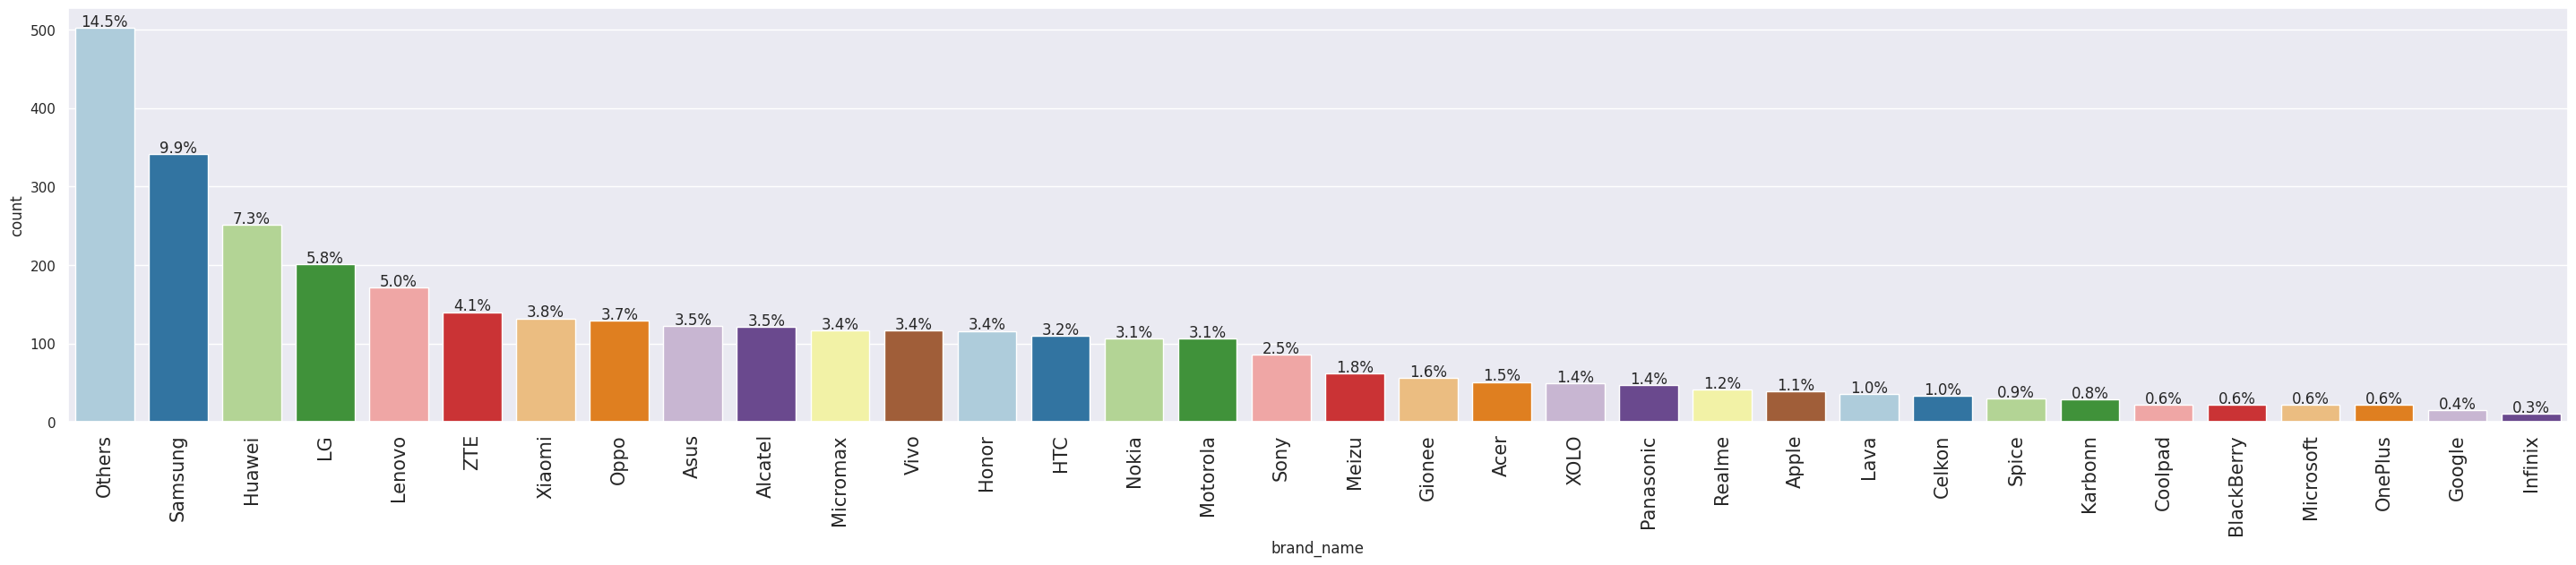

In [20]:
labeled_barplot(df, "brand_name", perc=True)

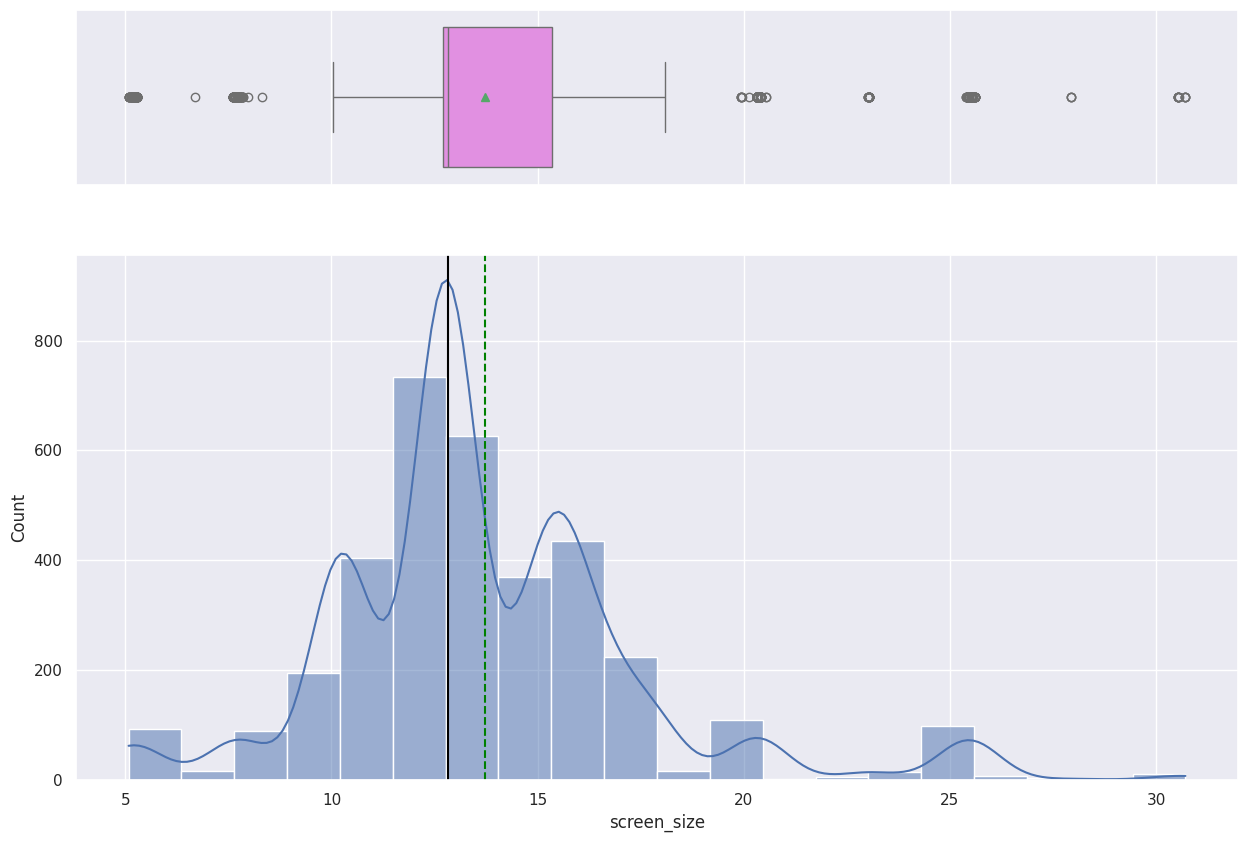

In [29]:
histogram_boxplot(df,'screen_size',kde=True,bins=20)

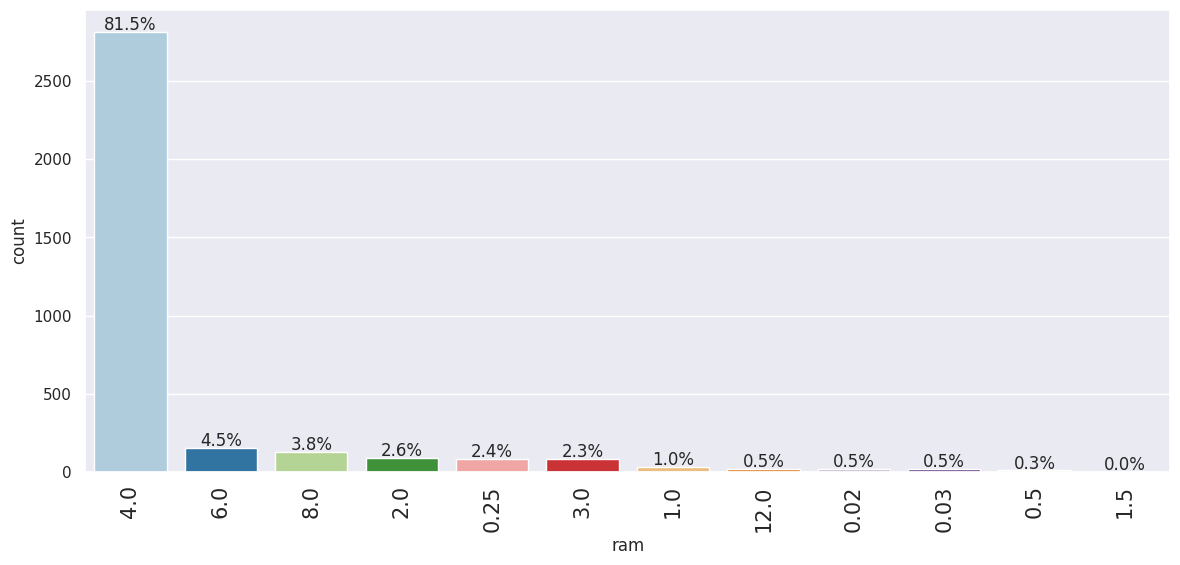

In [30]:
labeled_barplot(df, "ram", perc=True)

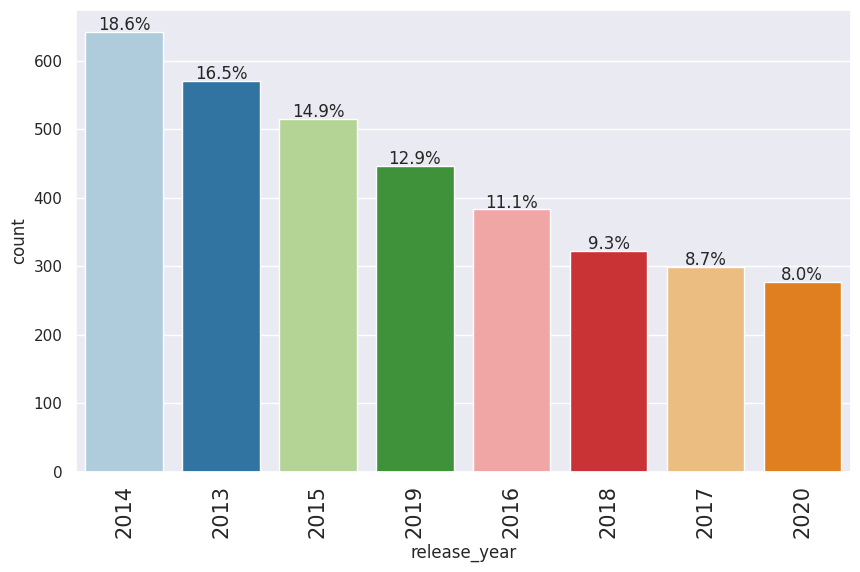

In [31]:
labeled_barplot(df, "release_year", perc=True)

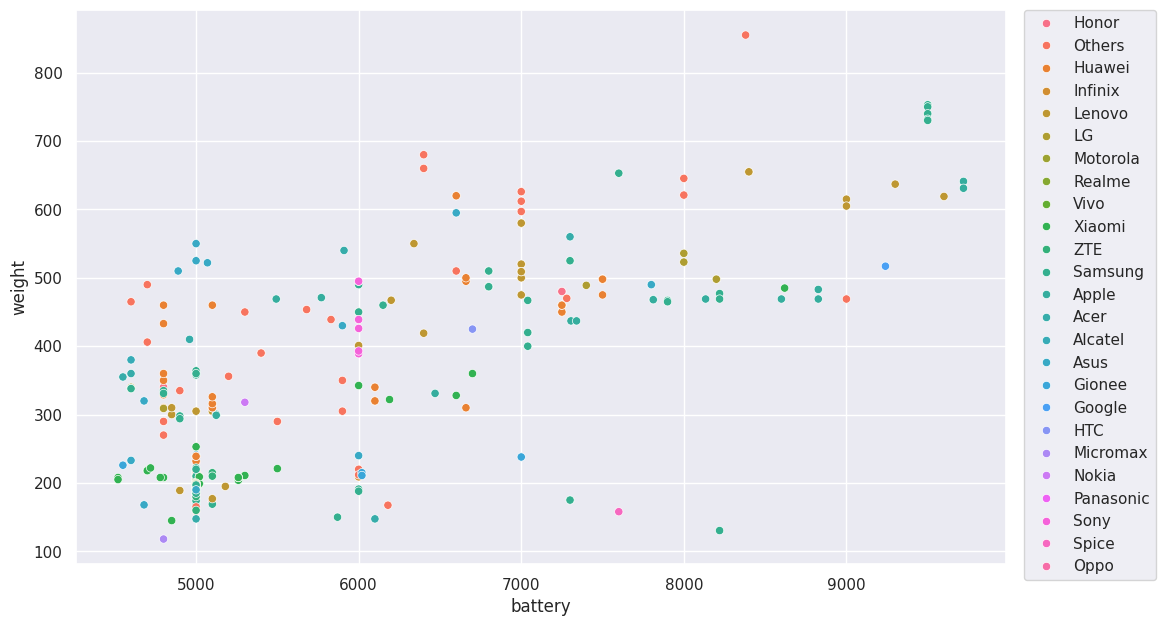

In [8]:
df_large_battery= df[df['battery']>4500]
plt.figure(figsize = (12,7.2))
sns.scatterplot(data=df_large_battery, x='battery', y='weight',hue='brand_name')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [34]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [9]:
df_final = df.copy()

In [10]:
missing_value_columns = ['main_camera_mp','selfie_camera_mp', 'int_memory','ram', 'battery','weight']


for col in missing_value_columns:
  df_final[col]=df_final[col].fillna(value=df_final.groupby(["brand_name","release_year"])[col].transform("median"))

df_final.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [11]:
still_missing = ['main_camera_mp','selfie_camera_mp','battery','weight']


for col in still_missing:
  df_final[col]=df_final[col].fillna(value=df_final.groupby(["brand_name"])[col].transform("median"))

df_final.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
dtype: int64

In [12]:
df_final['main_camera_mp']=df_final['main_camera_mp'].fillna(value=df_final['main_camera_mp'].median())

df_final.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [13]:
df_final['years_since_release']=2021-df_final['release_year']
df_final.drop('release_year',axis=1, inplace=True)
df_final.describe().T

count         mean          std     min        25%  \
screen_size          3454.0    13.713115     3.805280    5.08    12.7000   
main_camera_mp       3454.0     9.617597     4.749438    0.08     5.0000   
selfie_camera_mp     3454.0     6.555067     6.968440    0.00     2.0000   
int_memory           3454.0    54.528474    84.934991    0.01    16.0000   
ram                  3454.0     4.032620     1.368598    0.02     4.0000   
battery              3454.0  3132.577446  1298.884193  500.00  2100.0000   
weight               3454.0   182.636856    88.360445   69.00   142.0000   
days_used            3454.0   674.869716   248.580166   91.00   533.5000   
new_price            3454.0   237.038848   194.302782   18.20   120.3425   
used_price           3454.0    92.302936    54.701648    4.65    56.4825   
years_since_release  3454.0     5.034742     2.298455    1.00     3.0000   

                          50%       75%      max  
screen_size            12.830    15.340    30.71  
main_camera_mp          8.000    13.000    48.00  
selfie_camera_mp        5.000     8.000    32.00  
int_memory             32.000    64.000  1024.00  
ram                     4.000     4.000    12.00  
battery              3000.000  4000.000  9720.00  
weight                160.000   185.000   855.00  
days_used             690.500   868.750  1094.00  
new_price             189.785   291.115  2560.20  
used_price             81.870   116.245   749.52  
years_since_release     5.500     7.000     8.00

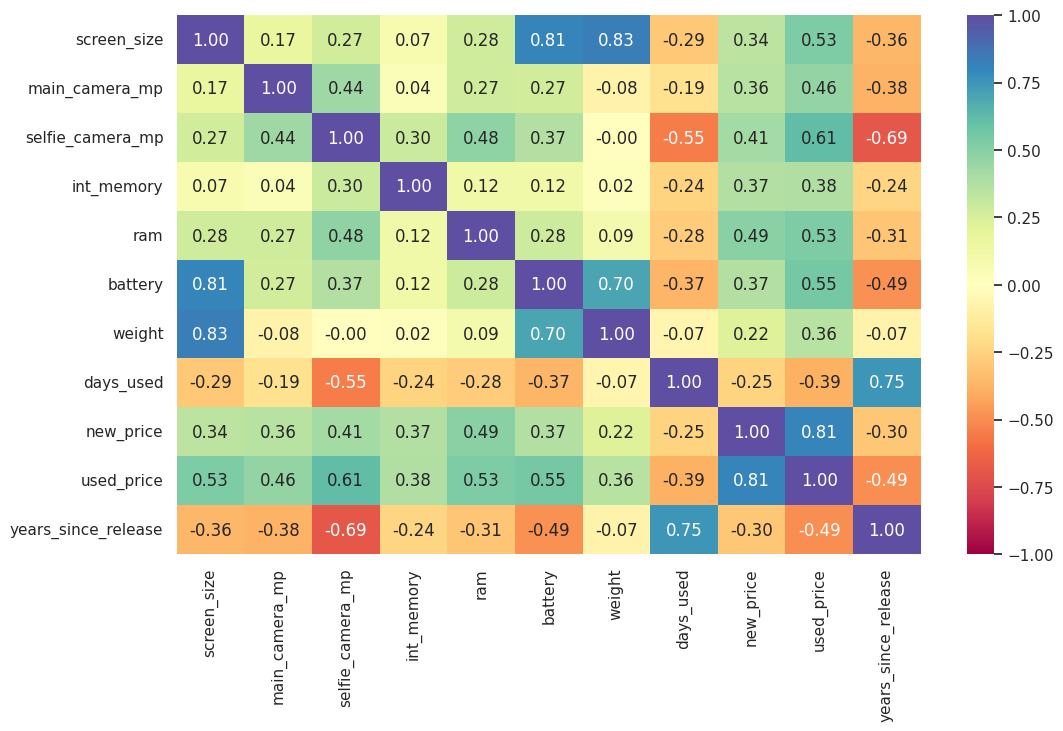

In [14]:
num_cols = df_final.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_final[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [15]:
X = df_final.drop(["used_price"], axis=1)
y = df_final["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  new_price  \
0               5.0        64.0  3.0   3020.0   146.0        127     111.62   
1              16.0       128.0  8.0   4300.0   213.0        325     249.39   
2               8.0       128.0  8.0   4200.0   213.0        162     359.47   
3               8.0        64.0  6.0   7250.0   480.0        345     278.93   
4               8.0        64.0  3.0   5000.0   185.0        293     140.87   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4              

In [16]:
X = sm.add_constant(X)

In [17]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127     111.62  ...             False   
1   4300.0   213.0        325     249.39  ...             False   
2   4200.0   213.0        162     359.47  ...             False   
3   7250.0   480.0        345     278.93  ...             False   
4   5000.0   185.0        293     140.87  ...             False   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0            False            False              False           False   
1            False            False              False           False   
2            False            False              False           False   
3            False            False              False           False   
4            False            False              False           False   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0      False       False   False    True   False  
1      False       False   False    True    True  
2      False       False   False    True    True  
3      False       False   False    True    True  
4      False       False   False    True   False  

[5 rows x 49 columns]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [20]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
predict=LR_model.predict(x_test)

print("Linear Regression")
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

Linear Regression
MSE:        23.575126098038265
MAE:        16.676457933705247
R2 score:   0.8174081021522437


In [21]:
RF_model=RandomForestRegressor()
RF_model.fit(x_train,y_train)
predict=RF_model.predict(x_test)
print('RandomForestRegressor')
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

RandomForestRegressor
MSE:        24.654607777064065
MAE:        16.876750048216007
R2 score:   0.8003038694921706


In [22]:
DT_model=DecisionTreeRegressor()
DT_model.fit(x_train,y_train)
predict=DT_model.predict(x_test)
print('DecisionTreeRegressor')
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

DecisionTreeRegressor
MSE:        33.37193844683183
MAE:        21.92390549662488
R2 score:   0.6341219787122354


In [23]:
KN_model=KNeighborsRegressor()
KN_model.fit(x_train,y_train)
predict=KN_model.predict(x_test)
print('KN_model')
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

KN_model
MSE:        28.37345692948286
MAE:        20.384115718418517
R2 score:   0.7355168808603001
